In [1]:
import os
import astropy.units as u
import astropy.constants as c
import galarp as grp

from gala import dynamics as gd
from gala.units import galactic

from matplotlib import pyplot as plt

import numpy as np

from astropy.table import Table

In [2]:
pot = grp.builtins.satellite_potentials.JZ2023_Satellite()

make_new = False

if not os.path.exists("base_particles.npy") or make_new:
    print("Output file does not exist, creating new particle set.")
    pset = grp.ExponentialParticleSet(5, 0.1)
    pset.seed(10000, pot)
    pset.save("base_particles")

else:
    pset = grp.ParticleSet.from_file("base_particles.npy")

[Text(0.5, 0, 'x'), Text(0, 0.5, 'z')]

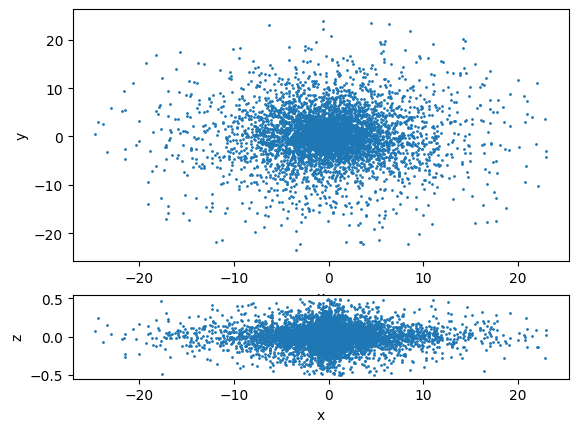

In [3]:
x,y, z = pset.positions

fig, ax = plt.subplots(2,1, height_ratios=[3,1])


ax[0].scatter(x, y, s=1)

ax[0].set(xlabel='x', ylabel='y')

ax[1].scatter(x,z, s=1)
ax[1].set(xlabel='x', ylabel='z')




(7096, 3) (7096, 3)
(7096, 3)
98946468400720.48


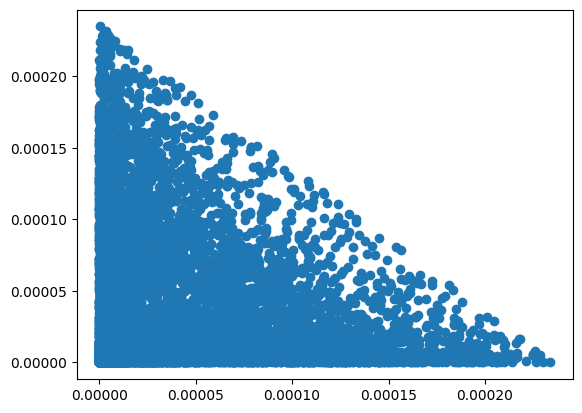

In [4]:
satellite_potential=grp.builtins.satpots.JZ2023_Satellite()
wind=grp.builtins.host_winds.BasicClusterWind()
rho_icm=grp.builtins.host_winds.BasicClusterDensity()

x, y, z = pset.phase_space_positions().xyz
vx, vy, vz = pset.phase_space_positions().v_xyz

q = np.stack([x,y,z], axis=1)
p = np.stack([vx,vy,vz], axis=1)

print(q.shape, p.shape)

wind_test = wind.evaluate(0)

v_rel = wind_test - p

a_ram = (v_rel ** 2) * (rho_icm.evaluate(0) / pset.surface_density())
print(a_ram.shape)

a_ram = a_ram.T
plt.scatter(a_ram[0], a_ram[1])

print(pset.sigma_gas * pset.sigma_gas)

In [11]:
sim = grp.RPSim(particles=pset, wind=grp.ConstantWind(strength=300 * u.km/u.s, disk_wind_angle=np.pi / 4))

orbits = sim.run(integration_time=1000 * u.Myr, wind_on=True)


        Use Integrator call method instead. [galarp.core.sim]


In [12]:
grp.plotting.k3d_plots.k3d_plot([orbits], outname="oorbits.html")

/Users/hsouch/anaconda3/envs/galarp_dev/lib/python3.12/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

In [7]:
# grp.plotting.animated_hexbin_plot(orbits, n_frames=20)

In [8]:
print(rho_icm.evaluate(0) * rho_icm.unitset.density.to(u.g / u.cm**3))


1.0000000000000002e-26


In [9]:
xs, ys, zs = pset.positions

def gen_velocities(pos, potential):
    xs, ys, zs = pos
    rs = np.sqrt(xs**2 + ys**2 + zs**2) * u.kpc
    theta = np.arctan2(ys, xs)
    incs = np.arctan2(zs, np.sqrt(xs**2 + ys**2))
    
    m_encs = potential.mass_enclosed([xs, ys, zs])

    v_circ = np.sqrt(c.G * m_encs / rs).to(u.km / u.s).value
    
    vx = np.sin(theta) * v_circ
    vy = np.cos(theta) * v_circ
    vz = np.sqrt(vx ** 2 + vy ** 2) * np.sin(incs)


gen_velocities(pset.positions, pot)    